<a href="https://colab.research.google.com/github/kirtirajput13/Logistic-Regression-for-Binary-Classification/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
)
from sklearn.impute import SimpleImputer


In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

In [4]:
# Data Preprocessing

# Drop unnecessary columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Handle missing values
# Fill missing 'Age' with the median value
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing 'Embarked' with the most frequent value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Convert categorical variables into numerical using Label Encoding
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])  # Male: 1, Female: 0
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

# Display the dataset after preprocessing
print("\nDataset after preprocessing:")
print(df.head())



Dataset after preprocessing:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2


<ipython-input-4-886ddd47b6fd>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-4-886ddd47b6fd>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [5]:
# Split the dataset into features (X) and target (y)
X = df.drop('Survived', axis=1)  # Features
y = df['Survived']  # Target


In [6]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Standardize the features (important for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
# Train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


LogisticRegression()

In [9]:
# Make predictions on the test set
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC


In [10]:
# Model Evaluation

# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# 2. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)



Accuracy: 0.8045

Confusion Matrix:
[[90 15]
 [20 54]]


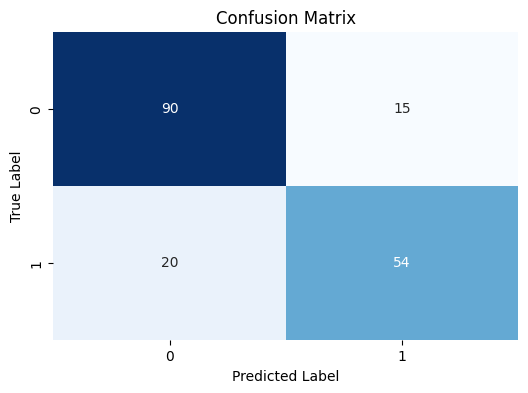

In [11]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [12]:
# 3. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 4. ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)



Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



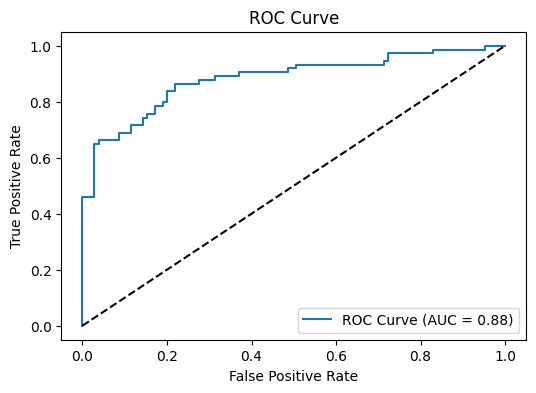

In [13]:
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [14]:
# Feature Importance (Coefficients)
feature_importance = pd.DataFrame({
    'Feature': df.drop('Survived', axis=1).columns,
    'Coefficient': log_reg.coef_[0]
})
print("\nFeature Importance (Coefficients):")
print(feature_importance.sort_values(by='Coefficient', ascending=False))


Feature Importance (Coefficients):
    Feature  Coefficient
5      Fare     0.126216
4     Parch    -0.098292
6  Embarked    -0.170860
3     SibSp    -0.349582
2       Age    -0.395574
0    Pclass    -0.782061
1       Sex    -1.278865
